<span style="font-size: 5em">🦜</span>

# __LangGraph Essentials__
## Lab 2: Parallel Execution
<div style="display:flex; align-items:flex-start;">
  <img src="../assets/Parallel.png" width="300" style="margin-right:15px;"/>
</div>

LangGraph enables parallel execution when a node has multiple outgoing edges. This notebook demonstrates how to build graphs with branching paths that execute simultaneously and then converge. We will use the operator.add reducer to accumulate results from parallel branches.


In [1]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

<a id='state_with_reducer'></a>


In [2]:
class State(TypedDict):
    nlist: Annotated[List[str], operator.add]

Here’s what’s going on:
- TypedDict
This says “State is a dictionary type with certain keys.” In this case, it has one key called nlist.
- nlist: Annotated[...]
Normally you’d just write nlist: list[str] to say “the value for nlist is a list of strings.”
But here it uses Annotated, which is a special tool from the typing module.
- What Annotated means
Annotated lets you attach extra information (metadata) to a type.
- The first part (list[str]) is the actual type.
- The second part (operator.add) is extra metadata. It doesn’t change the type itself, but it’s like a tag or note attached to it.
- So in plain terms
This line says:
- The dictionary key nlist must hold a list of strings.
- And we’re attaching the metadata operator.add to that type.
- Why do this?
- The metadata can be used by tools, frameworks, or libraries that read type hints.
- For example, some systems might look at the annotation and say “oh, when combining lists of strings, use operator.add.”
- On its own, Python doesn’t enforce or use the metadata — it’s just extra information for other code to interpret.


<a id='parallel_nodes'></a>


In [4]:
def node_a(state: State) -> State:
    print(f"Adding 'A' to {state['nlist']}")
    return(State(nlist = ["A"]))

def node_b(state: State) -> State:
    print(f"Adding 'B' to {state['nlist']}")
    return(State(nlist = ["B"]))

def node_c(state: State) -> State:
    print(f"Adding 'C' to {state['nlist']}")
    return(State(nlist = ["C"]))

def node_bb(state: State) -> State:
    print(f"Adding 'BB' to {state['nlist']}")
    return(State(nlist = ["BB"]))

def node_cc(state: State) -> State:
    print(f"Adding 'CC' to {state['nlist']}")
    return(State(nlist = ["CC"]))

def node_d(state: State) -> State:
    print(f"Adding 'D' to {state['nlist']}")
    return(State(nlist = ["D"]))

def node_e(state: State) -> State:
    print(f"Adding 'E' to {state['nlist']}")
    return(State(nlist = ["E"]))

<a id='parallel_graph'></a>


In [8]:
builder = StateGraph(State)

# Add nodes
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)
builder.add_node("bb", node_bb)
builder.add_node("cc", node_cc)
builder.add_node("d", node_d)

# Add edges
builder.add_edge(START,"a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "bb")
builder.add_edge("c", "cc")
builder.add_edge("bb", "d")
builder.add_edge("cc", "d")
builder.add_edge("d",END)

# Compile and display
graph = builder.compile()
#display(Image(graph.get_graph().draw_mermaid_png()))

<a id='parallel_execution'></a>


In [11]:
builder = StateGraph(State)

# Add nodes
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)
builder.add_node("bb", node_bb)
builder.add_node("cc", node_cc)
builder.add_node("d", node_d)
builder.add_node("e", node_e)

# Add edges
builder.add_edge(START,"a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("a", "e")
builder.add_edge("b", "bb")
builder.add_edge("c", "cc")
builder.add_edge("bb", "d")
builder.add_edge("cc", "d")
builder.add_edge("e",END)
builder.add_edge("d",END)

# Compile and display
graph = builder.compile()

In [12]:
initial_state = State(
    nlist = ["Initial String:"]
)
graph.invoke(initial_state)

Adding 'A' to ['Initial String:']
Adding 'B' to ['Initial String:', 'A']
Adding 'C' to ['Initial String:', 'A']
Adding 'E' to ['Initial String:', 'A']
Adding 'BB' to ['Initial String:', 'A', 'B', 'C', 'E']
Adding 'CC' to ['Initial String:', 'A', 'B', 'C', 'E']
Adding 'D' to ['Initial String:', 'A', 'B', 'C', 'E', 'BB', 'CC']


{'nlist': ['Initial String:', 'A', 'B', 'C', 'E', 'BB', 'CC', 'D']}

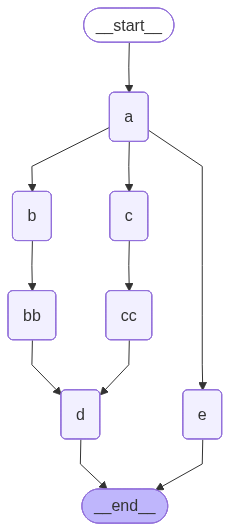

In [13]:
display(Image(graph.get_graph().draw_mermaid_png()))

## Takeaways

Setup:

- State: You added a [reducer function](#state_with_reducer) in the state definition using Annotated with operator.add
- Graph: You used [add_edge()](#parallel_graph) to create parallel paths from node 'a' to both 'b' and 'c'

Execution:

- Runtime: [Nodes b and c](#parallel_nodes) operate in parallel, executing simultaneously
- The reducer function merges the values returned from parallel branches
- Results from node b and c are stored to state before starting node bb and cc

Result:

- The [final result](#parallel_execution) contains all values added to `nlist` by all nodes
- Values accumulate in the order nodes complete execution

Try Next:

- Try adding a 3rd parallel path from node 'a'
- Rather than joining at d, have bb and cc pass control to END. Are values still merged?
- Change the reducer from operator.add to a different function to see how state merging changes